In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import graphviz 
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [9]:
df = pd.read_csv('titanic.csv')
df.shape

(887, 8)

In [10]:
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [11]:
df.Name.nunique() #유니크한 값을 인덱스로 잡기위해 Name컬럼의 유니크한 값 검색

887

In [12]:
df = df.set_index('Name') #2번이상 실행시 오류발생

In [13]:
df.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
Name,,,,,,,
Mr. Owen Harris Braund,0,3,male,22.0,1,0,7.2500
Mrs. John Bradley (Florence Briggs Thayer) Cumings,1,1,female,38.0,1,0,71.2833
Miss. Laina Heikkinen,1,3,female,26.0,0,0,7.9250
Mrs. Jacques Heath (Lily May Peel) Futrelle,1,1,female,35.0,1,0,53.1000
Mr. William Henry Allen,0,3,male,35.0,0,0,8.0500


In [14]:
df.columns = ['Survived', 'Pclass', 'Sex', 'Age', 'Siblings', 'Parents', 'Fare']

In [15]:
df.Survived.mean()

0.3855693348365276

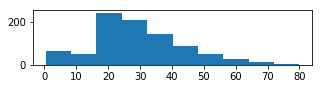

In [18]:
plt.figure(figsize = (5,1))
p = plt.hist(df.Age.values) #p = plt.hist(df['Age'].values) 와 동일

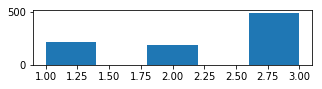

In [21]:
plt.figure(figsize=(5,1))
p = plt.hist(df['Pclass'].values, bins=5)

In [23]:
df['Sex'].value_counts()

male      573
female    314
Name: Sex, dtype: int64

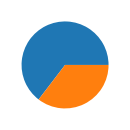

In [24]:
plt.figure(figsize=(5,2))
p = plt.pie(df['Sex'].value_counts())

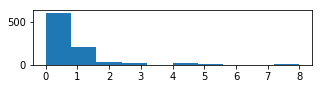

In [25]:
plt.figure(figsize=(5,1))
p = plt.hist(df['Siblings'].values)

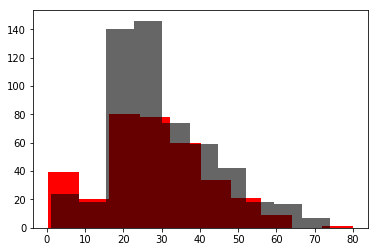

In [26]:
#생존한 사람들을 찾고 그들의 나이분포를 히스토그램으로 표시
p = plt.hist(df[df['Survived']==1]['Age'].values, color='red')
#사망한 사람들을 찾고 그들의 나이분포를 히스토그램으로 표시
p = plt.hist(df[df['Survived']==0]['Age'].values, color='black', alpha = 0.6)

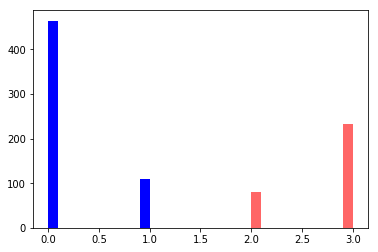

In [27]:
p = plt.hist(df[df['Sex']=='male']['Survived'].values, color = 'blue')
p = plt.hist(df[df['Sex']=='female']['Survived'].values+2, color = 'red', alpha=0.6)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 887 entries, Mr. Owen Harris Braund to Mr. Patrick Dooley
Data columns (total 7 columns):
Survived    887 non-null int64
Pclass      887 non-null int64
Sex         887 non-null object
Age         887 non-null float64
Siblings    887 non-null int64
Parents     887 non-null int64
Fare        887 non-null float64
dtypes: float64(2), int64(4), object(1)
memory usage: 95.4+ KB


In [29]:
df['Pclass'] = df['Pclass'].astype('object')

In [30]:
data = pd.get_dummies(df)

In [31]:
X = data.drop(columns = 'Survived')
y = data['Survived']

In [32]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth = 4).fit(X,y)

In [33]:
model.score(X,y)

0.8489289740698985

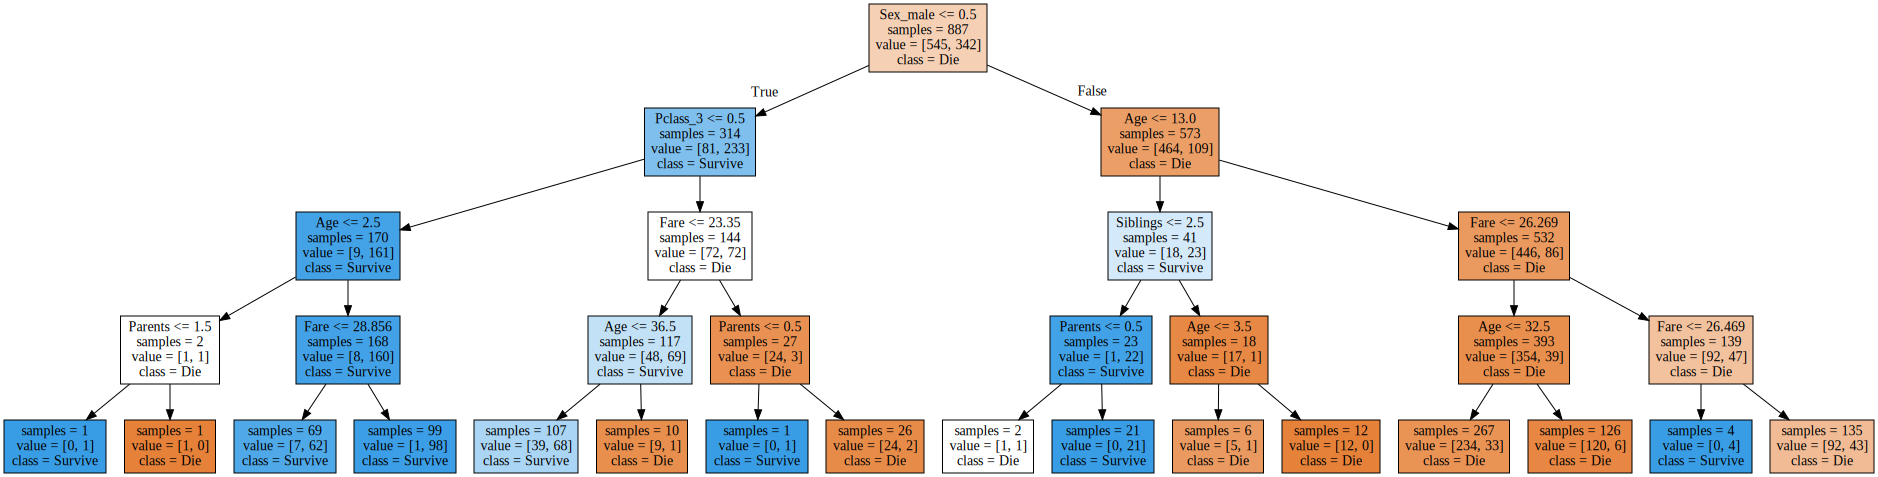

In [35]:
export_graphviz(model, out_file = 'titanic.dot', class_names=['Die', 'Survive'], 
               feature_names = X.columns, impurity=False, filled = True)
with open('titanic.dot') as f:
    dot_graph = f.read()
g = graphviz.Source(dot_graph)
display(g)

In [76]:
f = 'huawei.csv'
df = pd.read_csv(f, encoding='cp949', index_col=0)
df.shape

(241, 6)

In [77]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-07-02,5.82,5.82,5.82,5.82,5.82,0
2018-07-03,5.82,5.82,5.82,5.82,5.82,0
2018-07-04,5.82,5.82,5.82,5.82,5.82,0
2018-07-05,5.82,5.82,5.82,5.82,5.82,0
2018-07-06,5.82,5.82,5.82,5.82,5.82,0


In [78]:
df4 = df.iloc[:, :5]
df4 = df4.dropna()
df4.head()

,Open,High,Low,Close,Adj Close
Date,,,,,
2018-07-02,5.82,5.82,5.82,5.82,5.82
2018-07-03,5.82,5.82,5.82,5.82,5.82
2018-07-04,5.82,5.82,5.82,5.82,5.82
2018-07-05,5.82,5.82,5.82,5.82,5.82
2018-07-06,5.82,5.82,5.82,5.82,5.82


In [68]:
df4 = df4.replace(',', '', regex = True)
df4 = df4.astype(np.float)

In [42]:
#min max 정규화 [0,1]
minimum = np.min(df4, axis=0)
maximum = np.max(df4, axis=0)
df_norm = (df4 - minimum) / (maximum-minimum)

In [83]:
X = df_norm.iloc[:-1, :] #예측할수 없으므로 -1 (제일 마지막 행은 제외하고 카운트)
y = df_norm.iloc[1:, 0:1] #예측할것이 없기때문에 1
X.head()

,Open,High,Low,Close,Adj Close
Date,,,,,
2018-07-02,1.0,1.0,1.0,1.0,1.0
2018-07-03,1.0,1.0,1.0,1.0,1.0
2018-07-04,1.0,1.0,1.0,1.0,1.0
2018-07-05,1.0,1.0,1.0,1.0,1.0
2018-07-06,1.0,1.0,1.0,1.0,1.0


In [46]:
len(df4)

241

In [49]:
input_seq = 60
output_seq = 30
m = len(df4) - (input_seq + output_seq)+1
m

152

In [51]:
df4 = df4/df4.sum()
#min_max
df4 = (df4-df4.min())/(df4.max()-df4.min()) 
x_list = []
y_list = []
for i in range(m): #가장최근 60일, 30일을 기준으로 잡기위함
    x = df4.iloc[i:i+input_seq]
    y =df4.iloc[i+input_seq:i+input_seq+output_seq][['Open']]
    #rint(x.shape, y.shape)
    x_list.append(x)
    y_list.append(y)

In [52]:
len(x_list), type(x_list) #(155,60,12)
#155개를 스택에 쌓음
x_3d = np.stack(x_list, axis = 0)
y_3d = np.stack(y_list, axis = 0)
x_3d.shape, y_3d.shape

((152, 60, 5), (152, 30, 1))

In [55]:
test_ratio = 0.1
test_m = int(len(x_3d)*test_ratio)

152

In [56]:
m = len(x_3d)
x_2d = np.reshape(x_3d, [m, -1])#-1로 하면 컬럼쪽을 알아서 자동으로 2차원으로 맞춰줌...
y_2d = np.reshape(y_3d, [m, -1])
x_test = x_2d[:test_m]
x_train = x_2d[test_m:]
y_test = y_2d[:test_m]
y_train = y_2d[test_m:]

In [57]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
model = Ridge(normalize = True, solver='lsqr').fit(x_train, y_train) 

In [58]:
model.score(x_train, y_train), model.score(x_test, y_test)

(0.5116347523992987, -4.626658088244726)

In [59]:
#가장최근데이터
recent = df4.iloc[-input_seq:]
recent.shape
recent = np.reshape(np.array(recent), [1, -1])
recent.shape

(1, 300)

In [61]:
model.predict(recent) #미래예측

array([[0.12237194, 0.13526039, 0.14987126, 0.15968468, 0.16455035,
        0.1665044 , 0.17008216, 0.18064586, 0.19268216, 0.20504795,
        0.21873162, 0.23099856, 0.24022695, 0.24827034, 0.25697537,
        0.26212004, 0.26666127, 0.26835718, 0.27222438, 0.27727125,
        0.28625392, 0.3063821 , 0.33396774, 0.36118584, 0.38189641,
        0.39385858, 0.39968827, 0.39669358, 0.39130901, 0.3865624 ]])

No handles with labels found to put in legend.


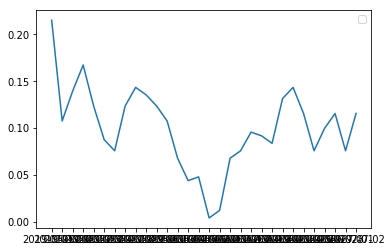

In [63]:
plt.plot(y)
plt.legend()